Step 1: Import Necessary Libraries and Load the Data

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, header=None, names=column_names)

# EDA
print("First 5 rows of the dataset:")
print(iris.head())

print("\nDataset description:")
print(iris.describe())

print("\nClass distribution:")
print(iris['class'].value_counts())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset description:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50

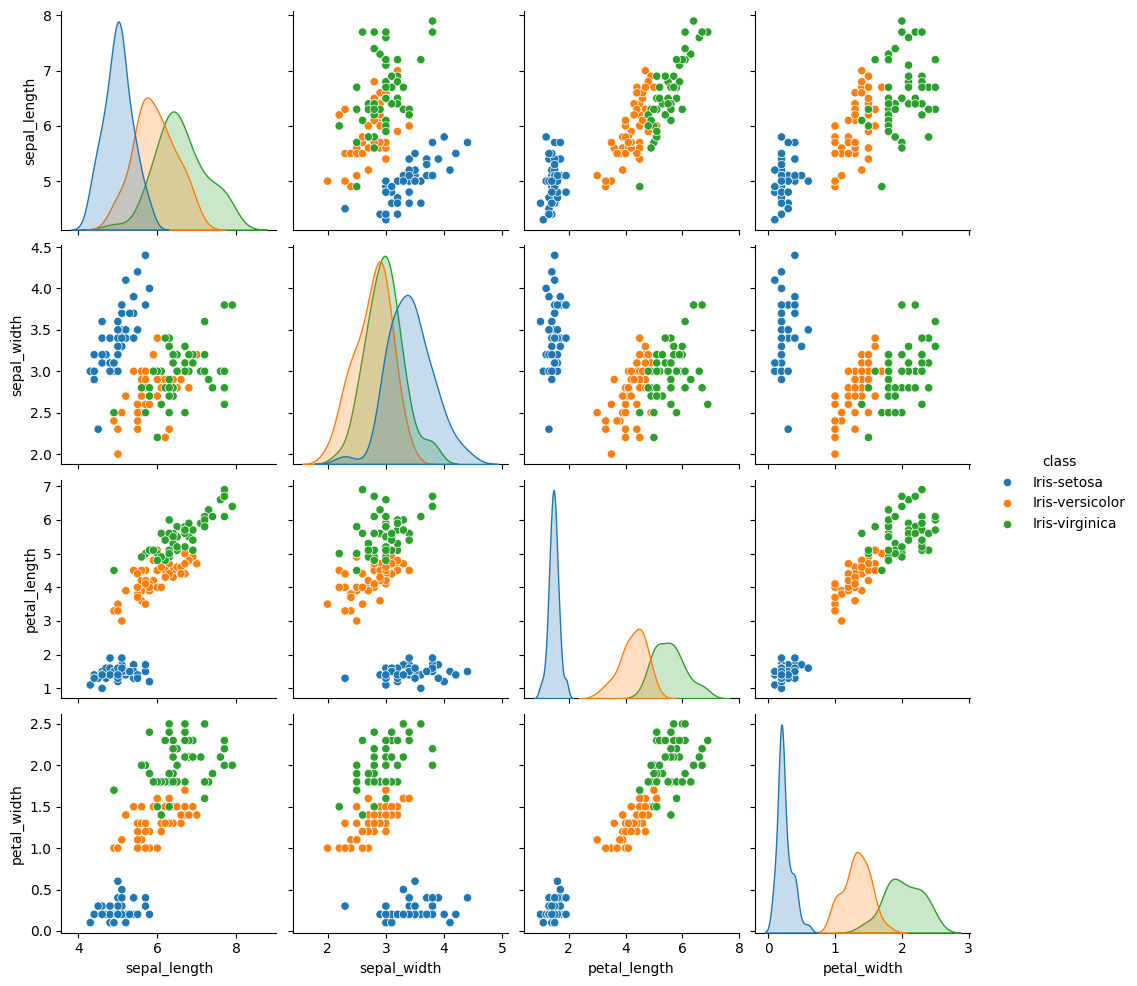

In [9]:
# Pairplot
sns.pairplot(iris, hue='class')
plt.show()


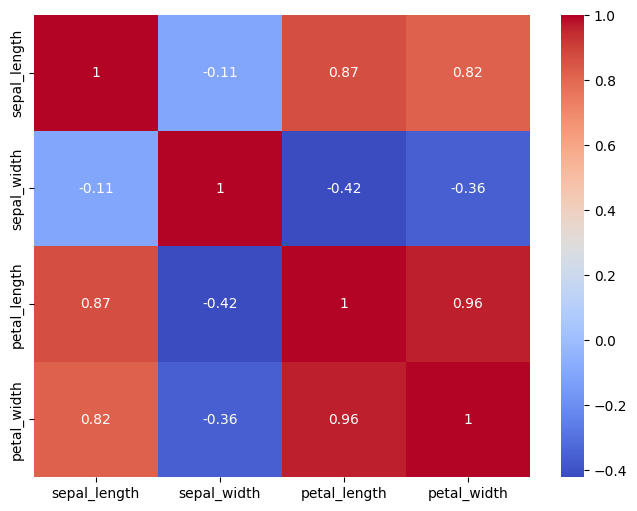

In [10]:
# Correlation heatmap (excluding 'class' column)
plt.figure(figsize=(8, 6))
sns.heatmap(iris.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Prepare the data
X = iris.iloc[:, :-1]  # Features
y = iris.iloc[:, -1]   # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 2: SVM Model

In [12]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

# Evaluate the SVM model
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_y_pred))
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))



SVM Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45


SVM Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


Step 3: Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(X_train, y_train)

# Make predictions
logreg_y_pred = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_y_pred))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logreg_y_pred))



Logistic Regression Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.87        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45


Logistic Regression Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


Step 4: Random Forest Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))



Random Forest Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45


Random Forest Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


Step 5: KNN Model

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_y_pred = knn_model.predict(X_test)

# Evaluate the KNN model
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_y_pred))
print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))



KNN Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.79      1.00      0.88        15
 Iris-virginica       1.00      0.73      0.85        15

       accuracy                           0.91        45
      macro avg       0.93      0.91      0.91        45
   weighted avg       0.93      0.91      0.91        45


KNN Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]


Step 6: Decision Tree Classifier


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))



Decision Tree Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45


Decision Tree Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


Step 7: Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_y_pred = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred))
print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, nb_y_pred))



Naive Bayes Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.87        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45


Naive Bayes Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


Step-8: Prediction of Iris Flower Species Based on User Input and Model Selection

In [30]:
# Function to predict iris flower species based on user input
def predict_iris_species(model, sepal_length, sepal_width, petal_length, petal_width):
    # Prepare input data
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]

# User input
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

# Model selection
print("Select the model:")
print("1. Support Vector Machine (SVM)")
print("2. Logistic Regression")
print("3. Random Forest")
print("4. K-Nearest Neighbors (KNN)")
print("5. Decision Tree")
print("6. Naive Bayes")

selected_model_idx = int(input("Enter the number corresponding to the model: "))

# Predict the iris flower species based on the selected model
if selected_model_idx == 1:
    predicted_species = predict_iris_species(svm_model, sepal_length, sepal_width, petal_length, petal_width)
    model_name = "Support Vector Machine (SVM)"
elif selected_model_idx == 2:
    predicted_species = predict_iris_species(logreg_model, sepal_length, sepal_width, petal_length, petal_width)
    model_name = "Logistic Regression"
elif selected_model_idx == 3:
    predicted_species = predict_iris_species(rf_model, sepal_length, sepal_width, petal_length, petal_width)
    model_name = "Random Forest"
elif selected_model_idx == 4:
    predicted_species = predict_iris_species(knn_model, sepal_length, sepal_width, petal_length, petal_width)
    model_name = "K-Nearest Neighbors (KNN)"
elif selected_model_idx == 5:
    predicted_species = predict_iris_species(dt_model, sepal_length, sepal_width, petal_length, petal_width)
    model_name = "Decision Tree"
elif selected_model_idx == 6:
    predicted_species = predict_iris_species(nb_model, sepal_length, sepal_width, petal_length, petal_width)
    model_name = "Naive Bayes"
else:
    print("Invalid model selection!")

print(f"\nPredicted iris flower species using {model_name}: {predicted_species}")

Enter sepal length: 5.0
Enter sepal width: 3.6
Enter petal length: 1.4
Enter petal width: 0.3
Select the model:
1. Support Vector Machine (SVM)
2. Logistic Regression
3. Random Forest
4. K-Nearest Neighbors (KNN)
5. Decision Tree
6. Naive Bayes
Enter the number corresponding to the model: 1

Predicted iris flower species using Support Vector Machine (SVM): Iris-virginica


Step-9: Prediction of Iris Flower Species Based on User Input and multiple Model Selection

In [35]:
# Function to predict iris flower species based on user input
def predict_iris_species(model, sepal_length, sepal_width, petal_length, petal_width):
    # Prepare input data
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]

# User input
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

# Models
models = {
    "Support Vector Machine (SVM)": svm_model,
    "Logistic Regression": logreg_model,
    "Random Forest": rf_model,
    "K-Nearest Neighbors (KNN)": knn_model,
    "Decision Tree": dt_model,
    "Naive Bayes": nb_model
}

# Model selection
print("Select the models (enter comma-separated numbers corresponding to the models):")
for i, (model_name, _) in enumerate(models.items(), start=1):
    print(f"{i}. {model_name}")

selected_model_indices = input("Enter the numbers corresponding to the models: ")
selected_model_indices = [int(idx) for idx in selected_model_indices.split(",")]

# Predict the iris flower species for each selected model
for idx in selected_model_indices:
    model_name, model = list(models.items())[idx - 1]  # Adjust index to match 0-based index
    predicted_species = predict_iris_species(model, sepal_length, sepal_width, petal_length, petal_width)
    print(f"\nPredicted iris flower species using {model_name}: {predicted_species}")


Enter sepal length: 3.3
Enter sepal width: 4.4
Enter petal length: 0.5
Enter petal width: 0.6
Select the models (enter comma-separated numbers corresponding to the models):
1. Support Vector Machine (SVM)
2. Logistic Regression
3. Random Forest
4. K-Nearest Neighbors (KNN)
5. Decision Tree
6. Naive Bayes
Enter the numbers corresponding to the models: 1,2,3,4,5,6

Predicted iris flower species using Support Vector Machine (SVM): Iris-virginica

Predicted iris flower species using Logistic Regression: Iris-versicolor

Predicted iris flower species using Random Forest: Iris-versicolor

Predicted iris flower species using K-Nearest Neighbors (KNN): Iris-virginica

Predicted iris flower species using Decision Tree: Iris-versicolor

Predicted iris flower species using Naive Bayes: Iris-virginica
